# Code to build ML models on the diabetes dataset

--- Data Loaded ---
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1 

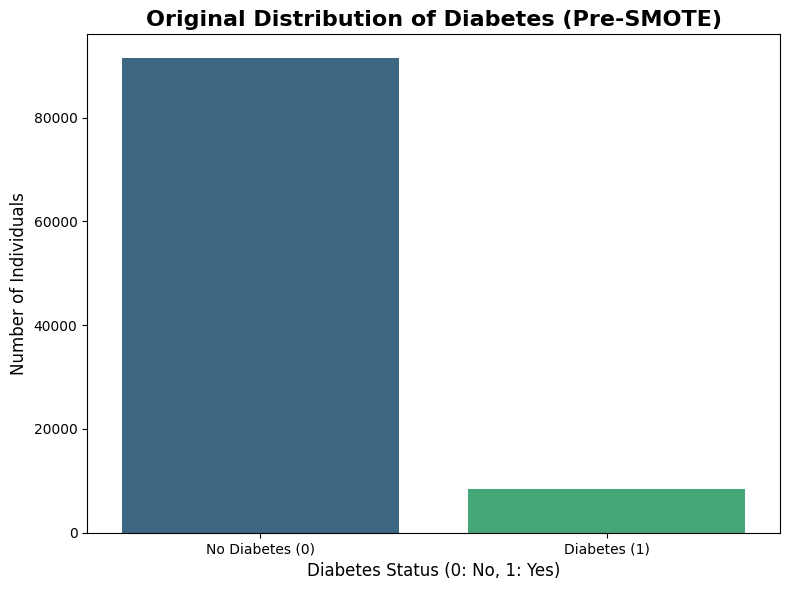


Training set class distribution:
0    0.915
1    0.085
Name: diabetes, dtype: float64
Test set class distribution:
0    0.915
1    0.085
Name: diabetes, dtype: float64

--- Applying Preprocessing and SMOTE to Training Data for Visualization ---

Training set size AFTER SMOTE: 146400 samples
Training set class distribution AFTER SMOTE:
1    0.5
0    0.5
Name: diabetes, dtype: float64


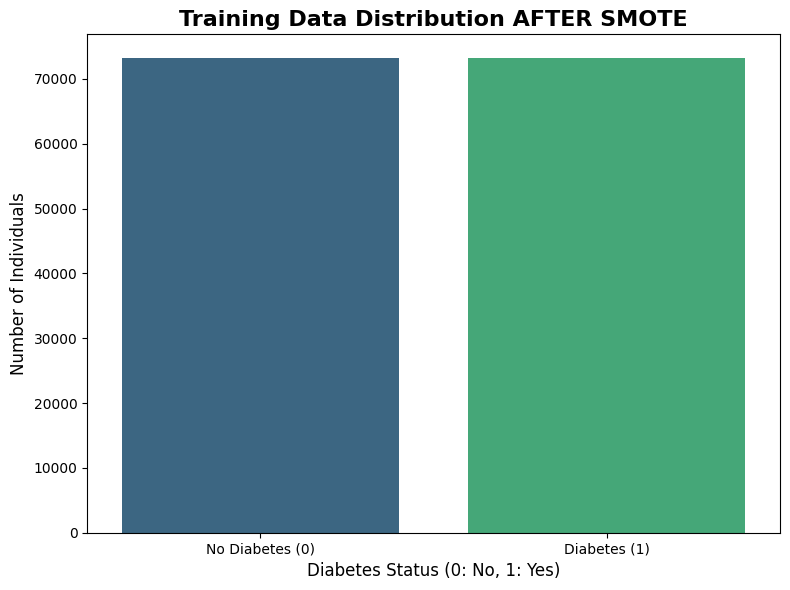


--- 7. Training and Evaluating Models ---
Training model: Logistic Regression...

--- Results for Logistic Regression ---
Accuracy: 0.8888
ROC AUC: 0.9629
Precision (Class 1): 0.4264
Recall (Class 1): 0.8935
F1-score (Class 1): 0.5773
Training model: Random Forest...

--- Results for Random Forest ---
Accuracy: 0.9695
ROC AUC: 0.9621
Precision (Class 1): 0.9311
Recall (Class 1): 0.6918
F1-score (Class 1): 0.7938
Training model: XGBoost...


/opt/homebrew/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [22:54:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



--- Results for XGBoost ---
Accuracy: 0.9206
ROC AUC: 0.9769
Precision (Class 1): 0.5192
Recall (Class 1): 0.8900
F1-score (Class 1): 0.6558
Training model: LightGBM...


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



--- Results for LightGBM ---
Accuracy: 0.9152
ROC AUC: 0.9789
Precision (Class 1): 0.5006
Recall (Class 1): 0.9082
F1-score (Class 1): 0.6455
Training model: CatBoost...

--- Results for CatBoost ---
Accuracy: 0.9241
ROC AUC: 0.9779
Precision (Class 1): 0.5322
Recall (Class 1): 0.8853
F1-score (Class 1): 0.6648
Training model: SVM (RBF Kernel)...

--- Results for SVM (RBF Kernel) ---
Accuracy: 0.8963
ROC AUC: 0.9688
Precision (Class 1): 0.4465
Recall (Class 1): 0.9188
F1-score (Class 1): 0.6010
Training model: Naive Bayes...

--- Results for Naive Bayes ---
Accuracy: 0.4682
ROC AUC: 0.9128
Precision (Class 1): 0.1368
Recall (Class 1): 0.9900
F1-score (Class 1): 0.2404
Training model: K-Nearest Neighbors...

--- Results for K-Nearest Neighbors ---
Accuracy: 0.9116
ROC AUC: 0.9119
Precision (Class 1): 0.4880
Recall (Class 1): 0.8029
F1-score (Class 1): 0.6071
Training model: Gradient Boosting (with SMOTE)...

--- Results for Gradient Boosting (with SMOTE) ---
Accuracy: 0.9544
ROC AUC: 0

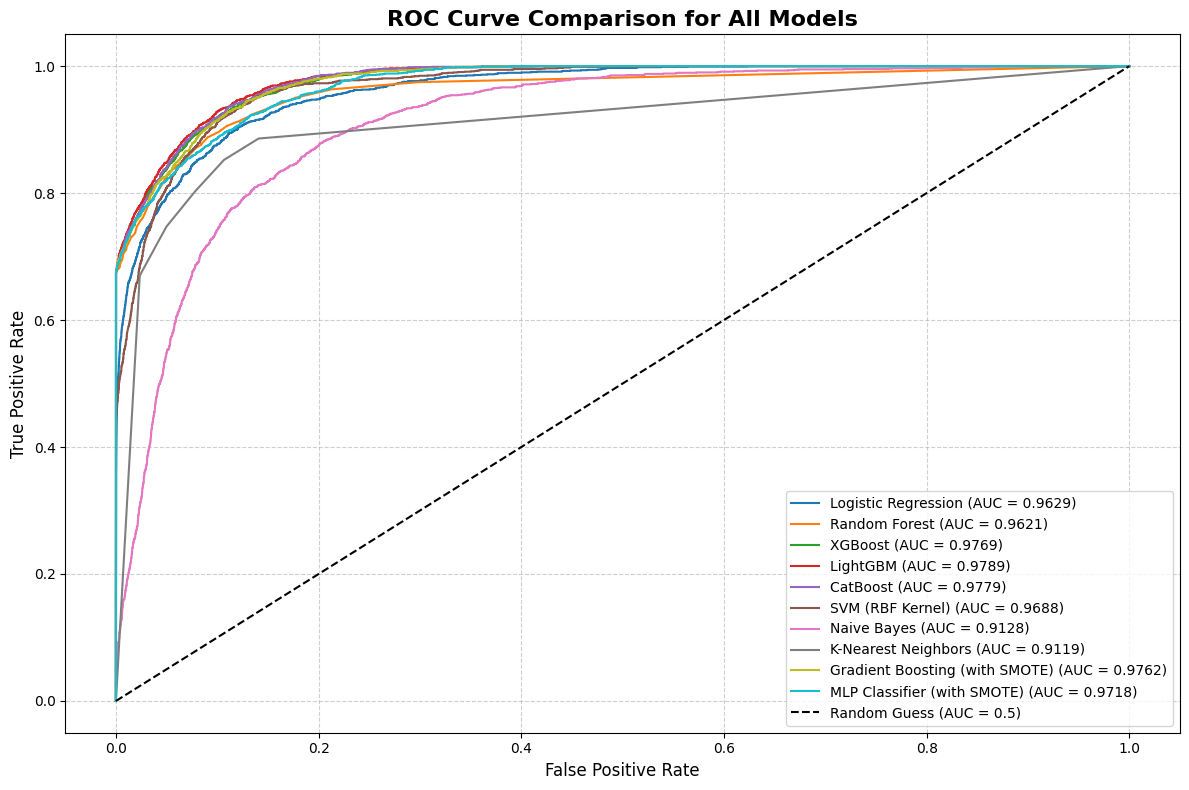


--- Visualizing Logistic Regression ---


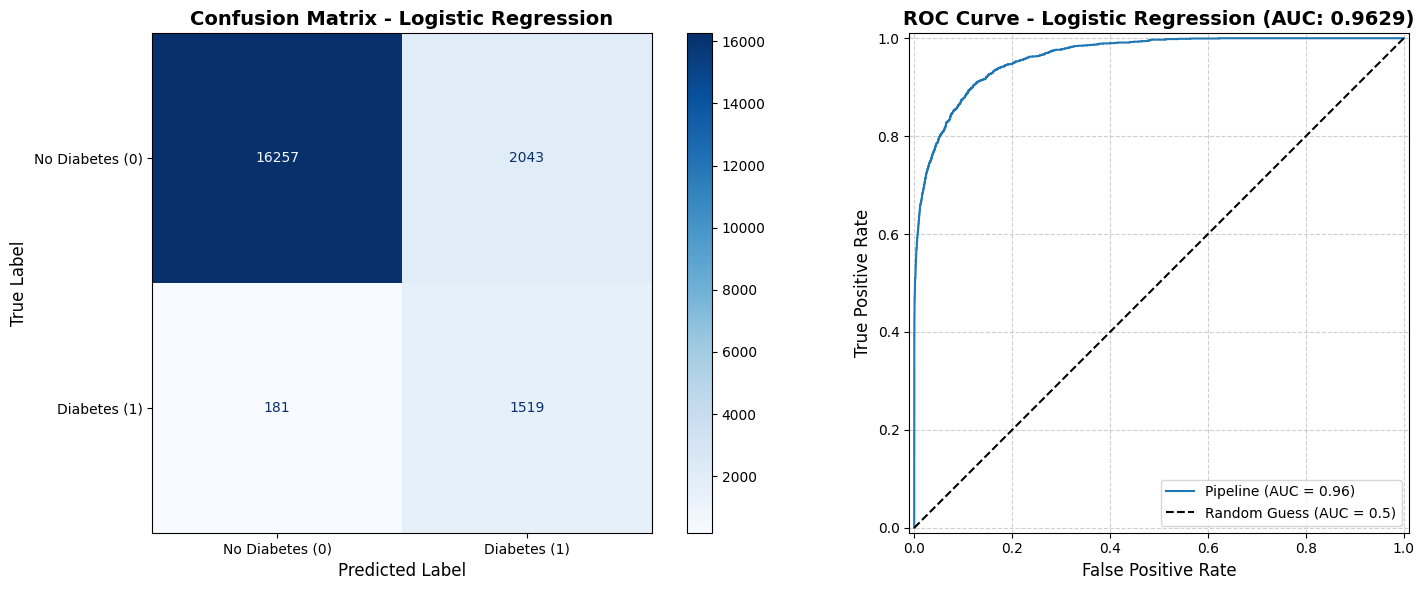


--- Visualizing Random Forest ---


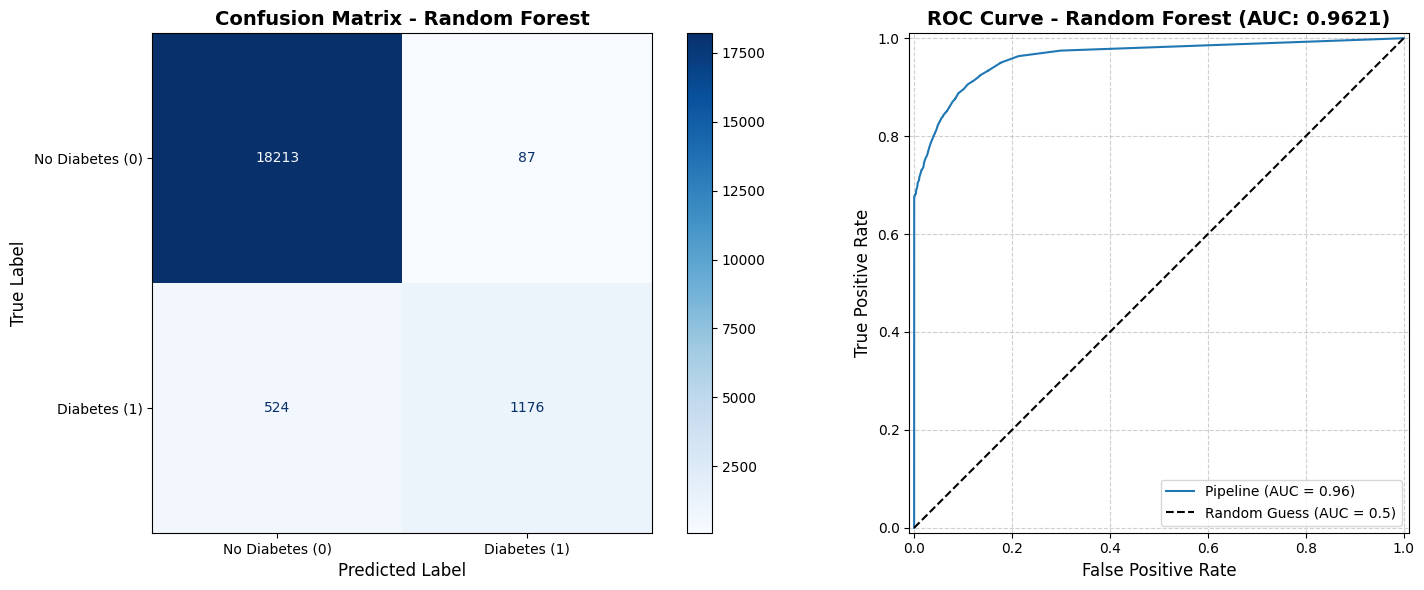


--- Visualizing XGBoost ---


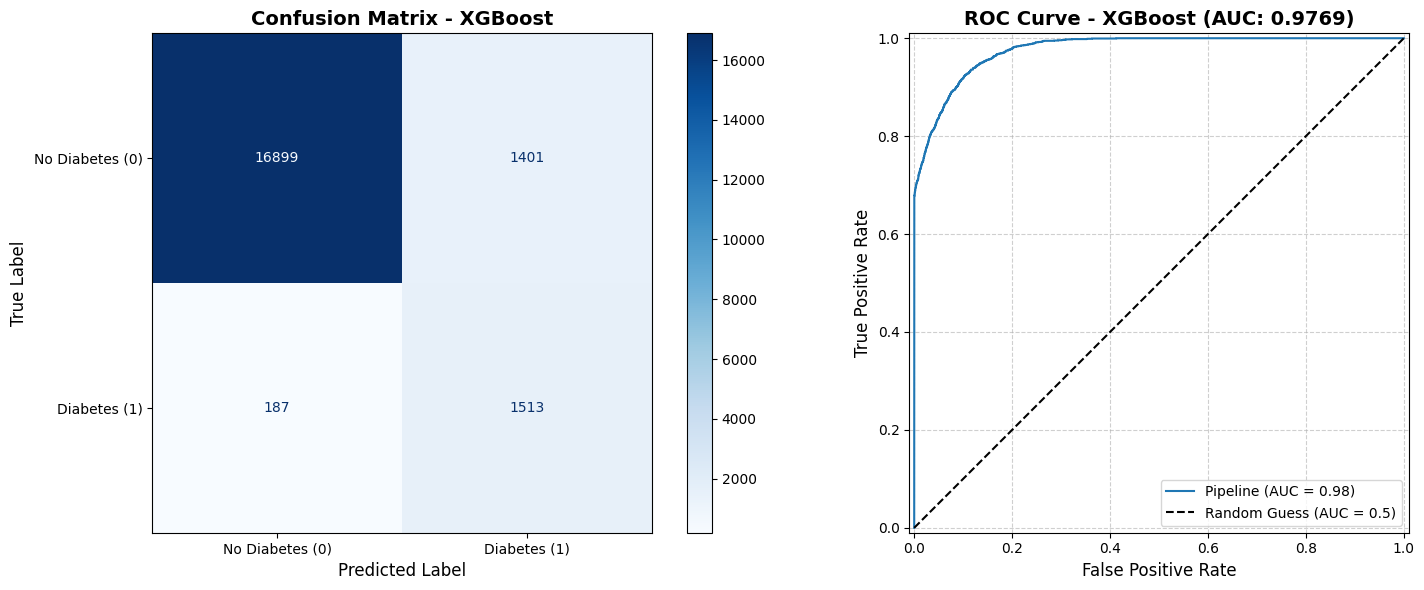


--- Visualizing LightGBM ---


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


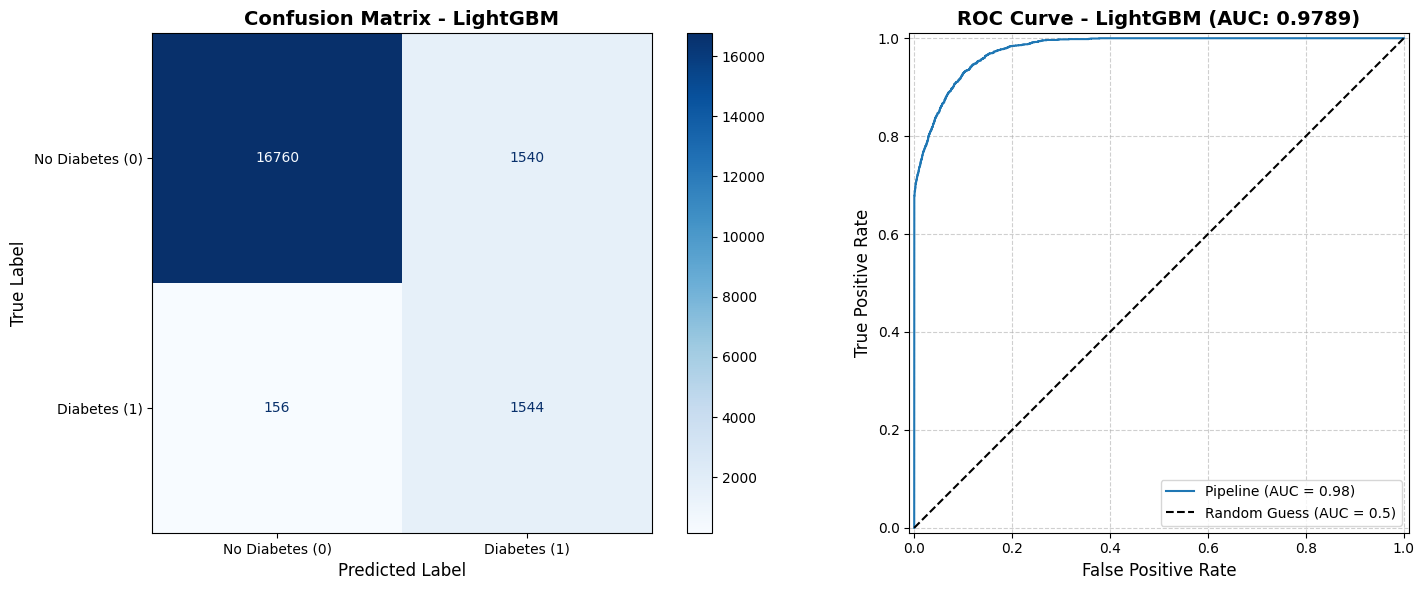


--- Visualizing CatBoost ---


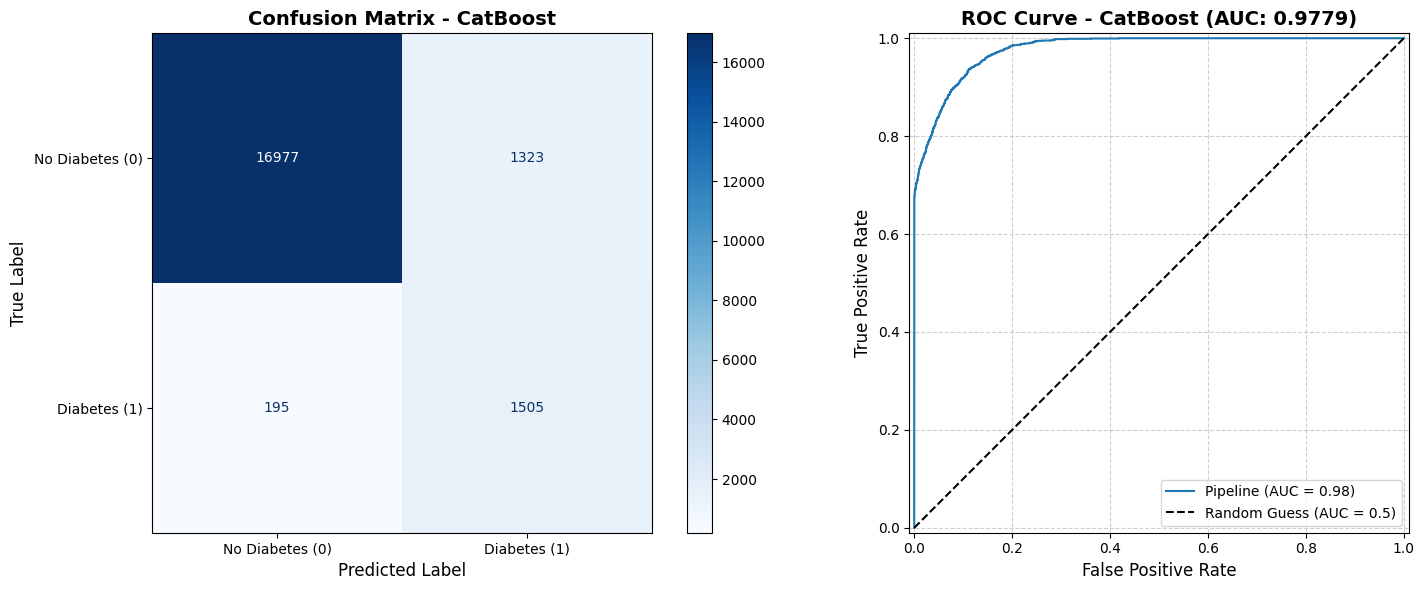


--- Visualizing SVM (RBF Kernel) ---


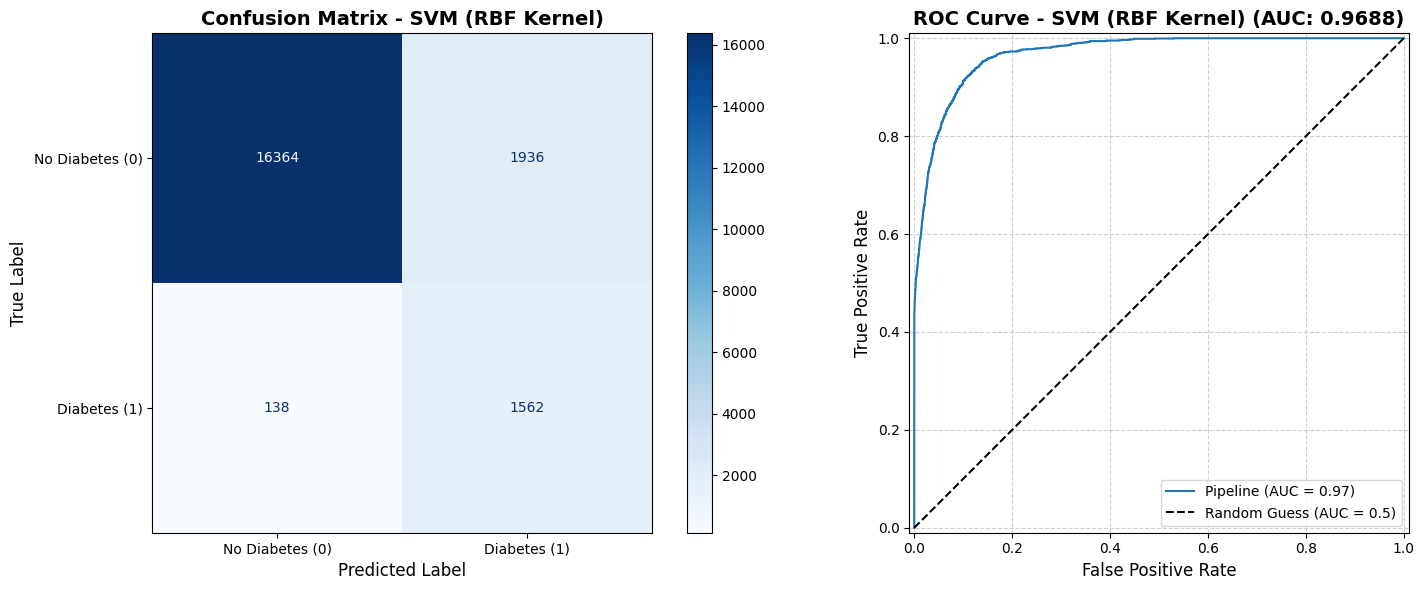


--- Visualizing Naive Bayes ---


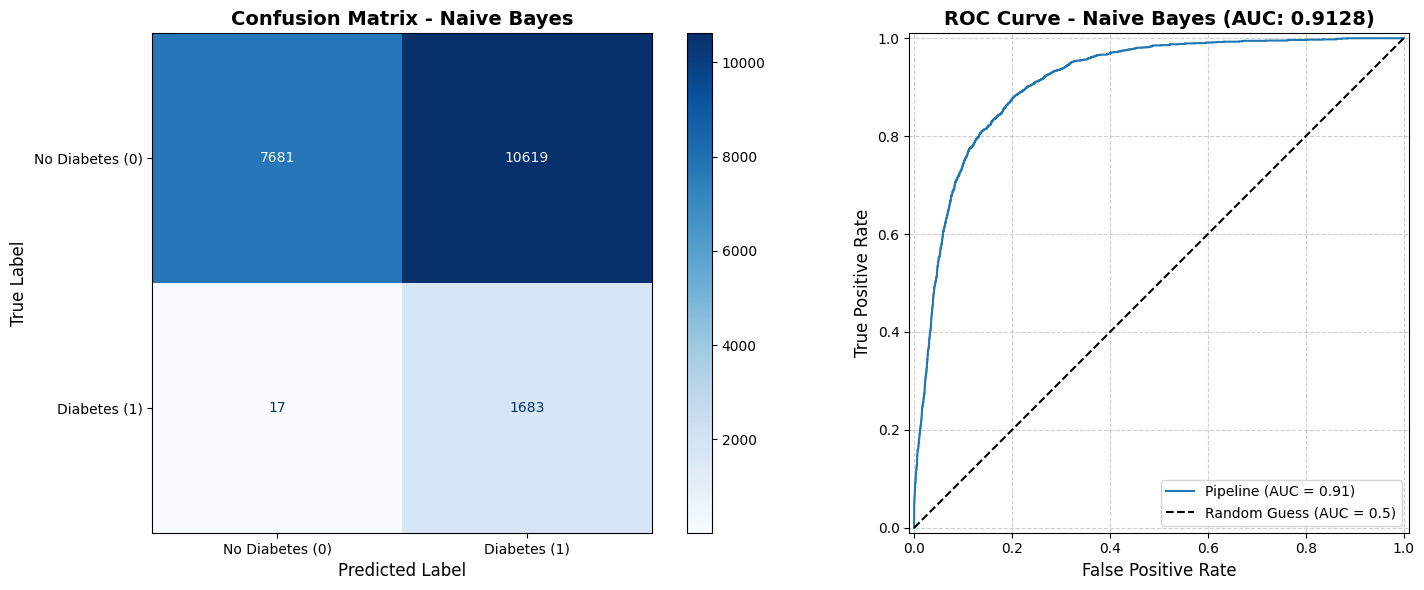


--- Visualizing K-Nearest Neighbors ---


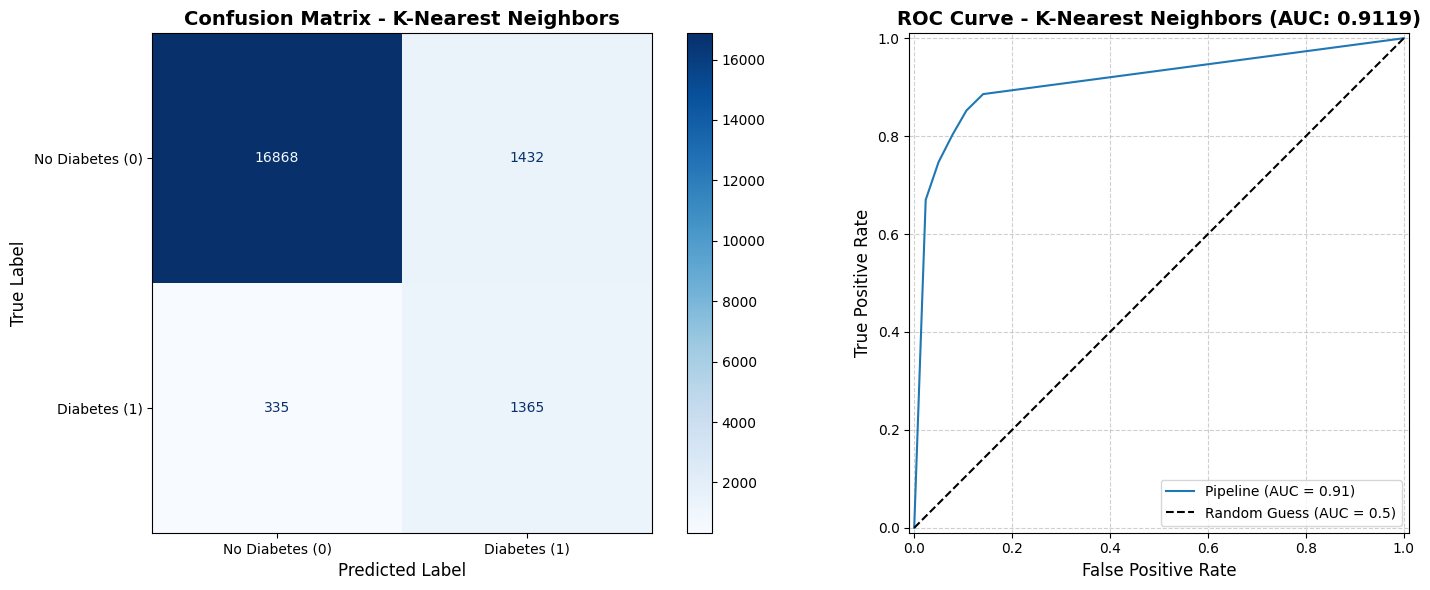


--- Visualizing Gradient Boosting (with SMOTE) ---


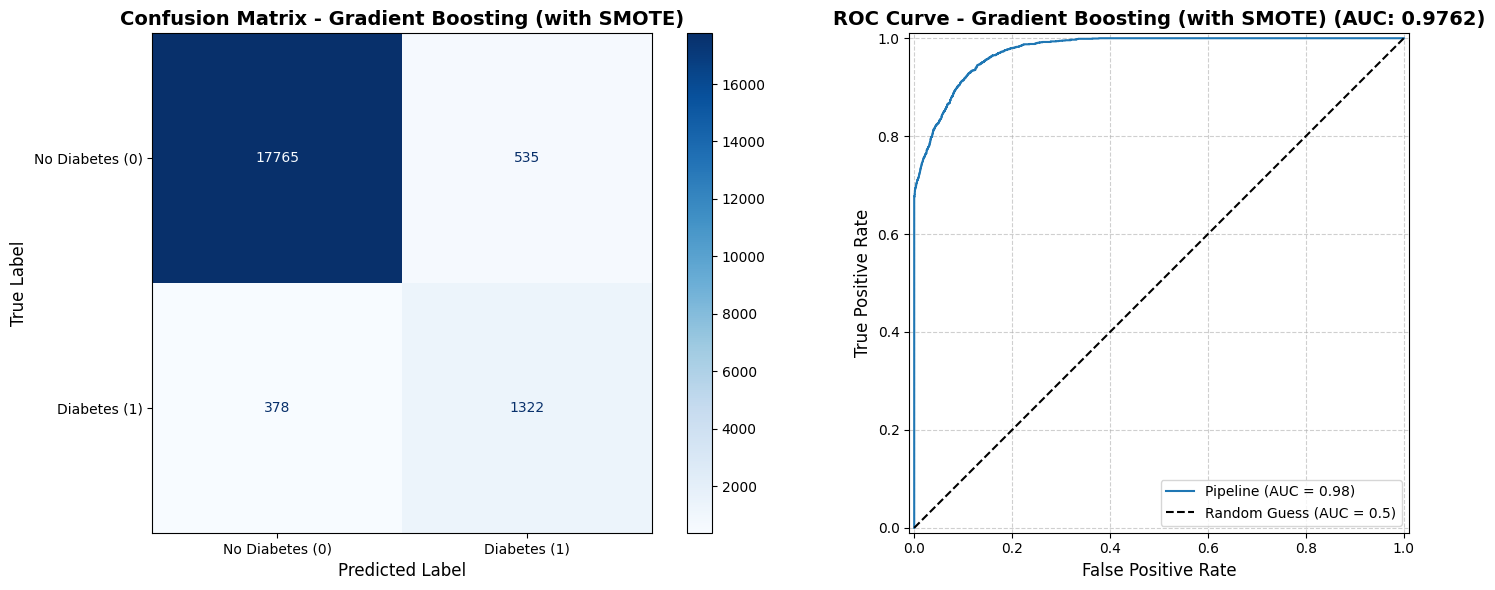


--- Visualizing MLP Classifier (with SMOTE) ---


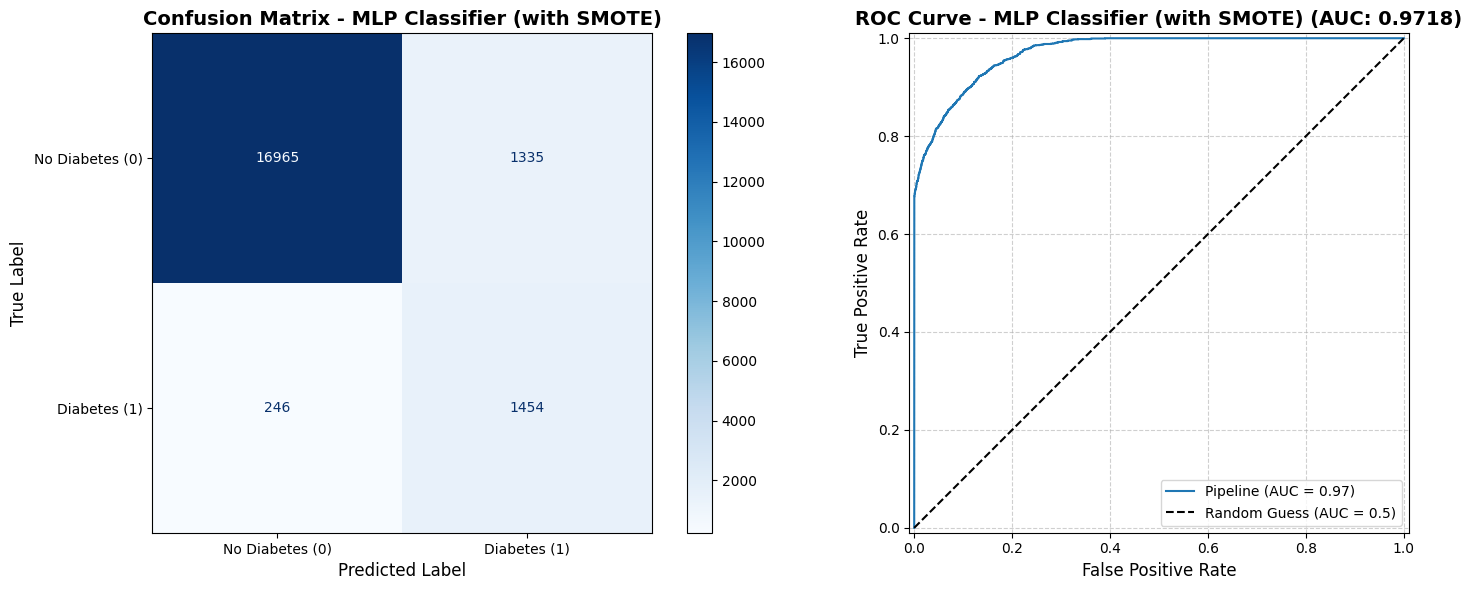


--- SHAP Explanation for the Best Model: LightGBM ---


/opt/homebrew/lib/python3.10/site-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


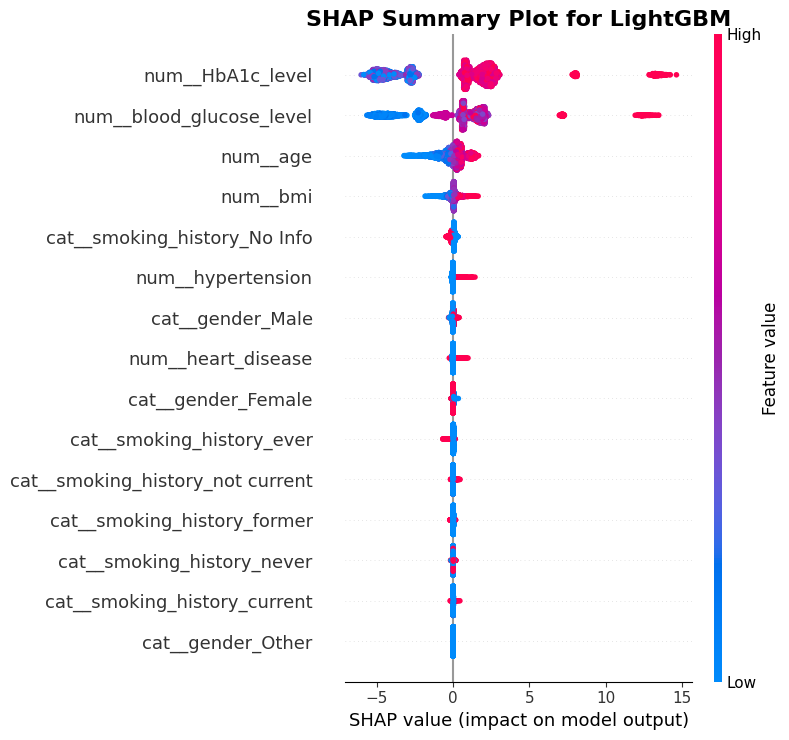

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # For better plots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, \
                            ConfusionMatrixDisplay, RocCurveDisplay, f1_score, precision_score, recall_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC # Support Vector Machine
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors
from sklearn.neural_network import MLPClassifier # Multi-layer Perceptron

# For handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline # Use imblearn's Pipeline for resampling steps

# For SHAP explanations
import shap

# --- 1. Load Data ---
try:
    df = pd.read_csv("diabetes_prediction_dataset.csv")
except FileNotFoundError:
    print("Error: 'diabetes_prediction_dataset.csv' not found.")
    print("Please ensure the CSV file is in the correct directory or provide the full path.")




# Drop rows where 'diabetes' target itself is NaN (if any)
df.dropna(subset=["diabetes"], inplace=True) # Ensure target column has no NaNs
X = df.drop(columns="diabetes")
y = df["diabetes"]

print("--- Data Loaded ---")
print(df.head())
print(df.info())

# --- 2. Initial Data Analysis (Missing Values and Class Imbalance) ---
print("\n--- Missing Values Count (Before Imputation) ---")
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

# Visualize Class Imbalance (Pre-SMOTE)
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=df, palette='viridis')
plt.title('Original Distribution of Diabetes (Pre-SMOTE)', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.tight_layout()
plt.show()

# --- 3. Column Identification & Preprocessing Pipelines ---
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=["number"]).columns.tolist()

numerical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numerical_transformer, numerical_cols),
    ("cat", categorical_transformer, categorical_cols)
])

# --- 4. Train/Test Split (Stratified is CRUCIAL) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"\nTraining set class distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test set class distribution:\n{y_test.value_counts(normalize=True)}")

# --- 5. Plotting Post-SMOTE Distribution ---
# Create a temporary pipeline to apply preprocessor and SMOTE on training data for visualization
smote_instance_for_plot = SMOTE(sampling_strategy='auto', random_state=42)
smote_pipeline_for_plotting = ImbPipeline([
    ("preprocessor", preprocessor),
    ("smote", smote_instance_for_plot)
])

# Fit and transform X_train, y_train to get the resampled data for plotting
print("\n--- Applying Preprocessing and SMOTE to Training Data for Visualization ---")
X_train_resampled_plot, y_train_resampled_plot = smote_pipeline_for_plotting.fit_resample(X_train, y_train)

print(f"\nTraining set size AFTER SMOTE: {len(X_train_resampled_plot)} samples")
print(f"Training set class distribution AFTER SMOTE:\n{y_train_resampled_plot.value_counts(normalize=True)}")

# Visualize Class Distribution AFTER SMOTE
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train_resampled_plot, palette='viridis')
plt.title('Training Data Distribution AFTER SMOTE', fontsize=16, fontweight='bold')
plt.xlabel('Diabetes Status (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.tight_layout()
plt.show()


# --- 6. Define Models with Class Balancing & SMOTE Integration ---
# Calculate scale_pos_weight for XGBoost based on original training data
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

# Define the SMOTE instance to be used within ImbPipelines
smote_instance = SMOTE(sampling_strategy='auto', random_state=42)

models_config = {
    "Logistic Regression": {
        "pipeline": Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", LogisticRegression(class_weight="balanced", max_iter=2000, random_state=42))
        ]),
        "use_smote_pipeline": False # Uses internal class_weight
    },
    "Random Forest": {
        "pipeline": Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", RandomForestClassifier(class_weight="balanced", random_state=42))
        ]),
        "use_smote_pipeline": False # Uses internal class_weight
    },
    "XGBoost": {
        "pipeline": Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", XGBClassifier(scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric="logloss", random_state=42))
        ]),
        "use_smote_pipeline": False # Uses internal scale_pos_weight
    },
    "LightGBM": {
        "pipeline": Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", LGBMClassifier(is_unbalance=True, random_state=42))
        ]),
        "use_smote_pipeline": False # Uses internal is_unbalance
    },
    "CatBoost": {
        "pipeline": Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", CatBoostClassifier(verbose=0, auto_class_weights='Balanced', random_state=42))
        ]),
        "use_smote_pipeline": False # Uses internal auto_class_weights
    },
    "SVM (RBF Kernel)": { # SVM is computationally expensive, reducing max_iter for faster demo
        "pipeline": Pipeline([
            ("preprocessor", preprocessor),
            ("classifier", SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42))
        ]),
        "use_smote_pipeline": False # Uses internal class_weight
    },
    "Naive Bayes": {
        "pipeline": ImbPipeline([ # GaussianNB doesn't have class_weight, so use SMOTE
            ("preprocessor", preprocessor),
            ("smote", smote_instance),
            ("classifier", GaussianNB())
        ]),
        "use_smote_pipeline": True
    },
    "K-Nearest Neighbors": {
        "pipeline": ImbPipeline([ # KNN benefits greatly from balanced data
            ("preprocessor", preprocessor),
            ("smote", smote_instance),
            ("classifier", KNeighborsClassifier())
        ]),
        "use_smote_pipeline": True
    },
    "Gradient Boosting (with SMOTE)": { # GradientBoostingClassifier does not have direct class_weight, benefits from SMOTE
        "pipeline": ImbPipeline([
            ("preprocessor", preprocessor),
            ("smote", smote_instance),
            ("classifier", GradientBoostingClassifier(random_state=42))
        ]),
        "use_smote_pipeline": True
    },
    "MLP Classifier (with SMOTE)": { # MLP can benefit from balanced data
        "pipeline": ImbPipeline([
            ("preprocessor", preprocessor),
            ("smote", smote_instance),
            ("classifier", MLPClassifier(max_iter=1000, random_state=42))
        ]),
        "use_smote_pipeline": True
    }
}

results = {}
best_roc_auc = -1
best_model_name = ""

print("\n--- 7. Training and Evaluating Models ---")
for name, config in models_config.items():
    print(f"Training model: {name}...")
    model_pipeline = config["pipeline"]

    model_pipeline.fit(X_train, y_train)
    y_pred = model_pipeline.predict(X_test)
    y_prob = model_pipeline.predict_proba(X_test)[:, 1] if hasattr(model_pipeline.named_steps["classifier"], "predict_proba") else None

    # Calculate metrics
    accuracy = (y_test == y_pred).mean()
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)'], output_dict=True)

    results[name] = {
        "model": model_pipeline,
        "accuracy": accuracy,
        "roc_auc": roc_auc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": conf_matrix,
        "classification_report": class_report,
        "y_pred": y_pred,
        "y_prob": y_prob
    }

    print(f"\n--- Results for {name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Precision (Class 1): {precision:.4f}")
    print(f"Recall (Class 1): {recall:.4f}")
    print(f"F1-score (Class 1): {f1:.4f}")
    # print(classification_report(y_test, y_pred, target_names=['No Diabetes (0)', 'Diabetes (1)']))

    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model_name = name

print(f"\n✅ Best Model identified by ROC AUC: {best_model_name} with ROC AUC = {best_roc_auc:.4f}")


# --- 8. Comprehensive Plotting for Each Model ---

# Overall ROC Curve Comparison
plt.figure(figsize=(12, 8))
for name in results:
    if results[name]["y_prob"] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[name]["y_prob"])
        plt.plot(fpr, tpr, label=f"{name} (AUC = {results[name]['roc_auc']:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess (AUC = 0.5)")
plt.title("ROC Curve Comparison for All Models", fontsize=16, fontweight='bold')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Individual Confusion Matrices and ROC Curves
for name, res in results.items():
    print(f"\n--- Visualizing {name} ---")

    fig, axes = plt.subplots(1, 2, figsize=(16, 6)) # 1 row, 2 columns

    # Confusion Matrix
    cm_display = ConfusionMatrixDisplay(confusion_matrix=res["confusion_matrix"],
                                        display_labels=['No Diabetes (0)', 'Diabetes (1)'])
    cm_display.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title(f'Confusion Matrix - {name}', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Predicted Label', fontsize=12)
    axes[0].set_ylabel('True Label', fontsize=12)
    axes[0].grid(False) # Remove grid from confusion matrix

    # ROC Curve
    if res["y_prob"] is not None:
        RocCurveDisplay.from_estimator(res["model"], X_test, y_test, ax=axes[1])
        axes[1].plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
        axes[1].set_title(f'ROC Curve - {name} (AUC: {res["roc_auc"]:.4f})', fontsize=14, fontweight='bold')
        axes[1].set_xlabel("False Positive Rate", fontsize=12)
        axes[1].set_ylabel("True Positive Rate", fontsize=12)
        axes[1].legend(fontsize=10)
        axes[1].grid(True, linestyle="--", alpha=0.6)
    else:
        axes[1].text(0.5, 0.5, "ROC Curve Not Applicable\n(No predict_proba)", horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes, fontsize=12, color='red')
        axes[1].set_title(f'ROC Curve - {name}', fontsize=14, fontweight='bold')
        axes[1].set_xlabel("False Positive Rate", fontsize=12)
        axes[1].set_ylabel("True Positive Rate", fontsize=12)

    plt.tight_layout()
    plt.show()


# --- 9. SHAP Explanations for the Best Model ---
print(f"\n--- SHAP Explanation for the Best Model: {best_model_name} ---")

best_model_pipeline = results[best_model_name]["model"]

# Extract the classifier and preprocessor from the best model's pipeline
classifier_model_final = None
preprocessor_final = None

if isinstance(best_model_pipeline, ImbPipeline):
    classifier_model_final = best_model_pipeline.named_steps["classifier"]
    preprocessor_final = best_model_pipeline.named_steps["preprocessor"]
elif isinstance(best_model_pipeline, Pipeline):
    classifier_model_final = best_model_pipeline.named_steps["classifier"]
    preprocessor_final = best_model_pipeline.named_steps["preprocessor"]

if classifier_model_final and preprocessor_final:
    # Get feature names after preprocessing
    feature_names_out = preprocessor_final.get_feature_names_out()

    # Determine which explainer to use
    if hasattr(classifier_model_final, "feature_importances_") or \
       isinstance(classifier_model_final, (XGBClassifier, RandomForestClassifier, GradientBoostingClassifier, CatBoostClassifier, LGBMClassifier)):
        # Use TreeExplainer for tree-based models
        explainer = shap.TreeExplainer(classifier_model_final)
        # Use a subset of the preprocessed X_test for SHAP values to balance speed and accuracy
        # Ensure X_test is transformed with the same preprocessor as used in the pipeline
        X_test_transformed_shap = preprocessor_final.transform(X_test)
        # Limit the number of samples for SHAP calculation to avoid long runtimes
        # If your data is very large, consider a smaller sample (e.g., 1000 or 500)
        sample_size = min(5000, X_test_transformed_shap.shape[0])
        shap_values = explainer.shap_values(X_test_transformed_shap[:sample_size])
        shap_features = X_test_transformed_shap[:sample_size]
    else:
        # Use KernelExplainer for non-tree-based models (e.g., Logistic Regression, SVM, KNN, Naive Bayes, MLP)
        # It requires a background dataset. Using a subset of X_train_resampled_plot for this.
        # This part requires X_train_resampled_plot to be accessible.
        # X_train_resampled_plot was generated earlier for the SMOTE plot.
        if 'y_train_resampled_plot' in locals() and X_train_resampled_plot is not None:
            # Taking a small sample for KernelExplainer's background data for speed
            background_data = shap.utils.sample(X_train_resampled_plot, 100) # Use 100 samples for background
            explainer = shap.KernelExplainer(classifier_model_final.predict_proba, background_data)
            # Use a subset of the preprocessed X_test for SHAP values
            X_test_transformed_shap = preprocessor_final.transform(X_test)
            sample_size = min(500, X_test_transformed_shap.shape[0]) # Even smaller sample for KernelExplainer's values
            shap_values = explainer.shap_values(X_test_transformed_shap[:sample_size])
            shap_features = X_test_transformed_shap[:sample_size]
        else:
            print("Cannot generate SHAP explanation for non-tree models without transformed training data.")
            shap_values = None # Indicate that SHAP values could not be generated

    if shap_values is not None:
        # For binary classification, shap_values is a list of arrays (one for each class).
        # We usually plot for the positive class (class 1).
        if isinstance(shap_values, list) and len(shap_values) == 2:
            shap.summary_plot(shap_values[1], shap_features, feature_names=feature_names_out, show=False)
        else: # For single output models or direct feature importances
            shap.summary_plot(shap_values, shap_features, feature_names=feature_names_out, show=False)
        plt.title(f"SHAP Summary Plot for {best_model_name}", fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        print("SHAP values could not be generated for plotting.")
else:
    print("Could not retrieve classifier or preprocessor for SHAP explanation.")
    

--- Data Loaded ---
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1 

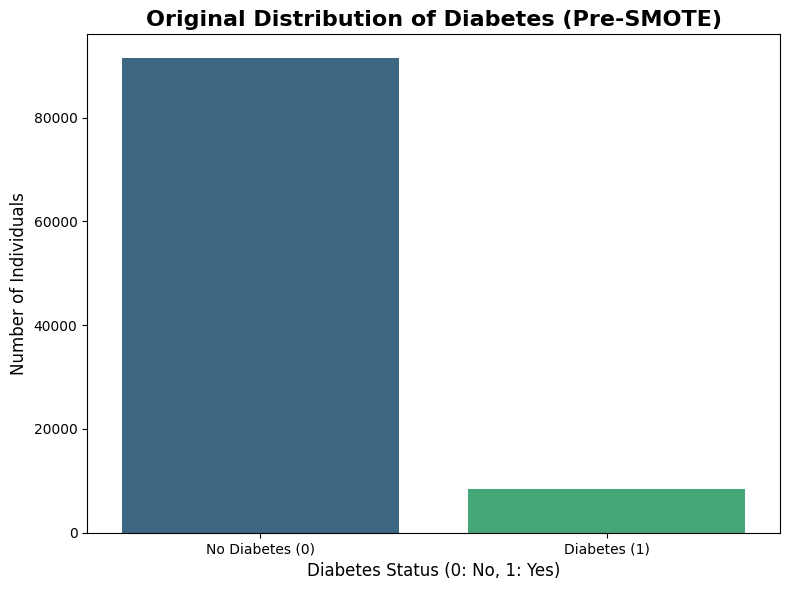


Training set class distribution:
0    0.915
1    0.085
Name: diabetes, dtype: float64
Test set class distribution:
0    0.915
1    0.085
Name: diabetes, dtype: float64

--- Applying Preprocessing and SMOTE to Training Data for Visualization ---

Training set size AFTER SMOTE (for plot): 146400 samples
Training set class distribution AFTER SMOTE (for plot):
1    0.5
0    0.5
Name: diabetes, dtype: float64


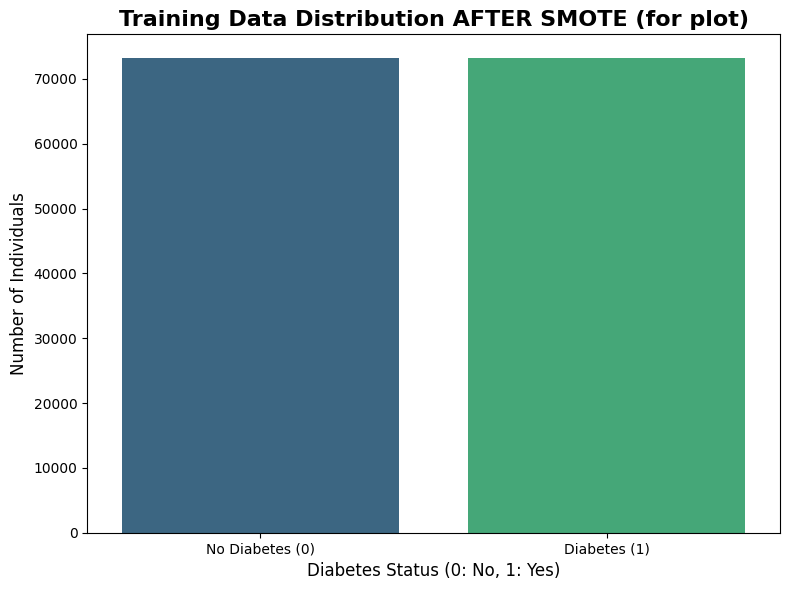


--- Starting Hyperparameter Tuning for LightGBM ---
Fitting 5 folds for each of 196608 candidates, totalling 983040 fits
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [In

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007353 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, cl

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010069 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 1

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003301 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samp

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013004 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used fea

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   2.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007327 seconds.
You can set `force_row_wise=true` to remove the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.2s

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   2.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014802 seconds.
You can set `force_row_wise=true` t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003233 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004746 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002353 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009629 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005415 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005282 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015356 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   2.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Auto-choosing row-wise mu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   2.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.5s

[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027648 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.0s
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] N

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009429 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Numb

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006159 seconds.
You can set `force_col_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   2.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used feature

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.6s
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [In

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002307 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001832 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014482 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006679 seconds.
You can set `force_col_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004827 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-thre

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003967 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used feature

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015134 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030895 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013719 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> init

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:Boost

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   2.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007350 seconds.
You can set `force_row_wise=true` to remove the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   2.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024449 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007922 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   3.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   2.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006299 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007117 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015438 seconds.
You can se

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   3.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> init

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005335 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   2.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014998 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   2.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   2.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.5s
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=20, classifier__reg_alpha=1, classifi

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420

[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019566 seconds.
You can set `force_col_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in th

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, cl

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 1

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003258 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001960 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.5s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036189 seconds.
You can set `force_col_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.5s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005202 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   4.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.054770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016842 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016669 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostF

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011755 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020341 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   4.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037398 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time= 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010614 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012387 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009007 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   3.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] N

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028042 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.069302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007614 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   3.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015291 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007050 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002313 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Inf

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001870 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001823 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025078 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035713 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, clas

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042991 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014947 seconds.
You can set `force_row_wise=true` to remove the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005653 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014491 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003765 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031435 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   4.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   4.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   4.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   4.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   4.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004146 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   3.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008882 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.1s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015817 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   4.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013405 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   4.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   4.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   5.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   4.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   4.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   4.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   3.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009974 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> init

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033285 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, cl

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028668 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used fea

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.7s

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.080690 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Ligh

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.046676 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  10.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  10.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040007 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  15.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.128880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  15.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  16.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  15.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  15.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  15.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  15.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Inf

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   6.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021664 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004799 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   7.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   7.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024218 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005529 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016538 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Inf

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004515 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019903 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001786 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005309 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026277 seconds.
You can set `force_col_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostF

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.125575 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.029056 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008007 seconds.
You can set `force_row_wise=true` to remove the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003128 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.105475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  11.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  11.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  11.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  11.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011688 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  13.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009857 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   5.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of neg

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004517 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.080727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003834 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-thre

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-thre

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010868 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003787 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034321 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   5.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420

[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Numbe

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 1

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013817 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018136 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.084495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041604 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.9s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010107 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=50, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007407 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   7.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004611 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  10.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  10.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012379 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002240 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  10.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  10.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  10.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  10.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  10.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   9.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002039 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   9.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004777 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031871 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classif

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.1s

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.229612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  10.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  10.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  10.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007028 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  12.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011691 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  12.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014712 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  12.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005930 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  13.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  11.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  11.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  10.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  10.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in th

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   9.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  10.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  10.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030569 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  10.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  10.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  11.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  11.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  11.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004984 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  11.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  11.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  10.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  11.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022900 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003050 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006901 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  11.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005041 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  11.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006227 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  11.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  11.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  11.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  11.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  10.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003730 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  10.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  10.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008498 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003048 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014924 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003770 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024908 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001714 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012689 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006671 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019869 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used fe

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016967 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003934 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023506 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  11.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  11.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  11.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  11.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  11.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  10.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  11.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006813 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006973 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.043503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001723 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008251 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001780 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010385 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  10.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  11.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007046 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  11.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  11.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  11.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  11.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002433 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007132 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003936 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.8s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027188 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009000 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001524 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004775 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.6s
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003197 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001738 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.072925 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003505 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004473 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.1s

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=100, classifier__num_leaves=70, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015414 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012675 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018528 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012913 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001954 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003662 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] N

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018287 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017816 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001832 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083553 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011210 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   5.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004912 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samp

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007056 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [I

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033864 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   5.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020577 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   5.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   6.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.100531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006185 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.5s[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.8s



/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   5.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015280 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002621 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040818 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011685 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003189 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.7s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006554 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.092549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008707 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011764 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016345 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   6.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.078525 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015249 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.0105

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008202 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012144 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.095147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  10.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011731 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013305 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  11.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002728 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   9.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003513 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009459 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  11.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019879 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001900 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006272 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004812 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001871 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004085 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003127 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   6.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   5.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003149 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001758 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   6.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.097788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011359 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013897 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   7.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   6.3s

[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.055144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013409 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   5.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012029 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[Light

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021774 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003679 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006012 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   6.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Numbe

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   7.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003829 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   5.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   6.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005184 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008396 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   6.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002919 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013566 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006386 seconds.
You can set `force_col_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003096 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   6.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   6.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005864 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   6.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.091835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002119 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014902 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.062479 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   9.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012124 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   9.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023708 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> init

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009053 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.4s
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   7.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006170 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.0s
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   6.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=20, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   7.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003995 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005008 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, cl

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   7.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002616 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.3s

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011467 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.042797 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   9.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.6s

[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018024 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007156 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   9.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   9.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   9.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   9.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005630 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001857 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  11.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  10.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  10.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034722 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] N

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006771 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  10.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   9.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  10.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  10.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  10.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  10.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  10.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  11.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  10.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019246 seconds.
You can set `force_col_wise=true` to remove the ove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  10.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003284 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007995 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001850 seconds.
You can set `force_row_wise=true` to remove t

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  10.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009596 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  12.5s
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  11.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010788 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  11.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  12.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  11.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009555 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   9.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  10.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  10.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007610 seconds.
You can set `force_col_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  11.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   9.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005576 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006320 seconds.
You can set `force_row_wise=true` to remo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  11.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  11.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  10.2s

[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   9.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002734 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  11.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  10.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  10.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  10.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  10.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-thre

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=  10.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042334 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   7.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifi

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007495 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  11.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  10.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  10.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  10.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  10.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_chil

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  10.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   9.8s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  10.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001587 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=  10.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013534 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002003 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004584 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030747 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003075 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   7.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used fea

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.051220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010002 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classif

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   9.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   9.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used feature

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  10.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.175187 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  11.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  11.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  10.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  11.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  11.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  12.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009072 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003206 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005578 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   7.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002462 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.065848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024577 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011068 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007373 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used featu

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=   9.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_es

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   9.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   9.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005136 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.061834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   9.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   9.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.8; total time=  10.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  13.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=0.9; total time=  12.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  12.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  13.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  13.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  13.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=0.5, classifier__reg_lambda=1, classifier__subsample=1.0; total time=  13.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  13.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008613 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Numbe

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.9s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.7; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003659 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.8; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:Bo

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=0.9; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   7.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006073 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.077378 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0, classifier__subsample=1.0; total time=   8.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003706 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004527 seconds.
You can set `force_row_wise=true`

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.5s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011968 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   9.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033661 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=   7.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.067507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   9.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005313 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   9.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.8s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017698 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004875 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011548 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   8.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008156 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=   9.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003440 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=  11.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  11.4s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  12.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  11.5s
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  11.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=  11.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=0.9; total time=  13.0s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=0.5, classifier__subsample=1.0; total time=   8.5s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.037211 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [bin

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   9.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.7s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006327 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.7; total time=   8.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estima

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006435 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.8; total time=   8.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015054 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013774 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.0s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   9.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.1s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=0.9; total time=   8.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.3s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   8.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=31, classifier__reg_alpha=1, classifier__reg_lambda=1, classifier__subsample=1.0; total time=   9.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  12.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002800 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  12.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  12.0s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  11.6s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.7; total time=  11.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012794 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  12.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005932 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  11.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  11.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.8; total time=  12.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005403 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  12.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  13.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  12.2s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  12.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048304 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=0.9; total time=  14.6s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  14.6s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003054 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  13.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  14.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  14.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0, classifier__subsample=1.0; total time=  14.9s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  14.3s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006666 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_esti

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  11.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing w

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  11.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.7; total time=  12.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005130 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  12.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001889 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  12.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007975 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  12.7s
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  12.5s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  12.7s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007016 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.8; total time=  13.7s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013890 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  13.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  14.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  14.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=0.9; total time=  14.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  14.3s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  14.7s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  14.0s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  14.8s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features:

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.1, classifier__subsample=1.0; total time=  13.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=  13.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=  12.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=  12.9s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=  12.2s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.7; total time=  12.4s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=  12.1s


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273
[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=  12.4s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002746 seconds.
You can set `force_row_wise=true` to remove

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=  12.2s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=  12.1s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[CV] END classifier__colsample_bytree=0.7, classifier__learning_rate=0.01, classifier__max_depth=-1, classifier__min_child_samples=10, classifier__n_estimators=200, classifier__num_leaves=50, classifier__reg_alpha=0, classifier__reg_lambda=0.5, classifier__subsample=0.8; total time=  15.8s
[LightGBM] [Info] Number of positive: 5440, number of negative: 58560
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 420
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.085000 -> initscore=-2.376273
[LightGBM] [Info] Start training from score -2.376273


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
# Fine tuning the LightGBM model



In [43]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

# Define the full pipeline with SMOTE
lgb_pipeline = Pipeline([
    ("preprocessor", preprocessor),                    # Your preprocessing steps (e.g., ColumnTransformer)
    ("smote", SMOTE(random_state=42)),                # Apply SMOTE after preprocessing
    ("classifier", LGBMClassifier(random_state=42))   # Use is_unbalance=False when using SMOTE
])

# Define the hyperparameter search space
param_distributions = {
    "classifier__n_estimators": randint(100, 500),
    "classifier__learning_rate": uniform(0.01, 0.1),  # 0.01 to 0.11
    "classifier__max_depth": randint(3, 10),
    "classifier__num_leaves": randint(15, 60),
    "classifier__min_child_samples": randint(10, 50),
    "classifier__subsample": uniform(0.6, 0.4),
    "classifier__colsample_bytree": uniform(0.6, 0.4)
}

# Use RandomizedSearchCV for hyperparameter tuning
lgb_random_search = RandomizedSearchCV(
    lgb_pipeline,
    param_distributions=param_distributions,
    n_iter=30,
    scoring="roc_auc",
    n_jobs=-1,
    cv=3,
    verbose=1,
    random_state=42
)

# Fit on the training data (SMOTE will be applied inside the pipeline during fitting)
lgb_random_search.fit(X_train, y_train)

# Get the best model
best_lgb_model = lgb_random_search.best_estimator_
print("\n✅ Best Parameters Found:")
print(lgb_random_search.best_params_)

# Evaluate on test data
y_pred_lgb = best_lgb_model.predict(X_test)
y_prob_lgb = best_lgb_model.predict_proba(X_test)[:, 1]

print("\n--- Tuned LightGBM Performance ---")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_lgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lgb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lgb):.4f}")


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025725 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> in

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034030 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026587 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010286 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020240 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029987 seconds.
You can set `force_row

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012809 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.5

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028859 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.109981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008925 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.0

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Warning] No furth

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014400 seconds.
You can set `force_row

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with pos

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012201 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.049170 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021806 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain,

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026669 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 48800, number of negative: 48800
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.027833 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3066
[LightGBM] [Info] Number of data points in the train set: 97600, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



✅ Best Parameters Found:
{'classifier__colsample_bytree': 0.7666039791481465, 'classifier__learning_rate': 0.09832802589188683, 'classifier__max_depth': 4, 'classifier__min_child_samples': 37, 'classifier__n_estimators': 330, 'classifier__num_leaves': 47, 'classifier__subsample': 0.7088528997538541}

--- Tuned LightGBM Performance ---
ROC AUC: 0.9784
F1 Score: 0.8062
Precision: 0.9397
Recall: 0.7059


/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


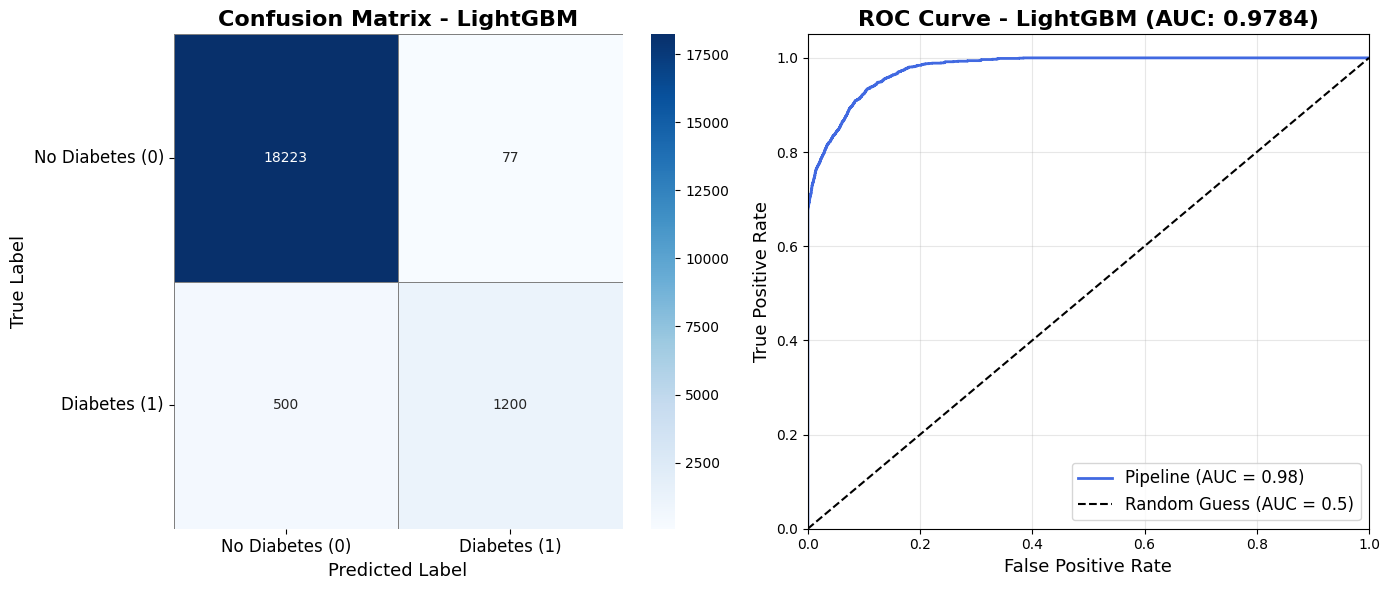

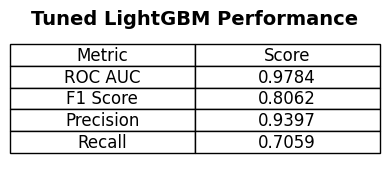

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion matrix and ROC
cm = confusion_matrix(y_test, y_pred_lgb)
fpr, tpr, _ = roc_curve(y_test, y_prob_lgb)
roc_auc = auc(fpr, tpr)

# Metrics for table
metrics_dict = {
    "ROC AUC": round(roc_auc_score(y_test, y_prob_lgb), 4),
    "F1 Score": round(f1_score(y_test, y_pred_lgb), 4),
    "Precision": round(precision_score(y_test, y_pred_lgb), 4),
    "Recall": round(recall_score(y_test, y_pred_lgb), 4)
}

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# 1️⃣ Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=True, linewidths=0.5, linecolor='gray')
ax[0].set_title('Confusion Matrix - LightGBM', fontsize=16, fontweight='bold')
ax[0].set_xlabel('Predicted Label', fontsize=13)
ax[0].set_ylabel('True Label', fontsize=13)
ax[0].set_xticklabels(['No Diabetes (0)', 'Diabetes (1)'], fontsize=12)
ax[0].set_yticklabels(['No Diabetes (0)', 'Diabetes (1)'], fontsize=12, rotation=0)

# 2️⃣ ROC Curve
ax[1].plot(fpr, tpr, color='royalblue', lw=2, label=f'Pipeline (AUC = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], color='black', linestyle='--', label='Random Guess (AUC = 0.5)')
ax[1].set_xlim([0.0, 1.0])
ax[1].set_ylim([0.0, 1.05])
ax[1].set_xlabel('False Positive Rate', fontsize=13)
ax[1].set_ylabel('True Positive Rate', fontsize=13)
ax[1].set_title(f'ROC Curve - LightGBM (AUC: {roc_auc:.4f})', fontsize=16, fontweight='bold')
ax[1].legend(loc="lower right", fontsize=12)
ax[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 📊 Display Performance Table Separately
fig, ax = plt.subplots(figsize=(4, 1.8))
table_data = [[k, v] for k, v in metrics_dict.items()]
table = ax.table(cellText=table_data,
                 colLabels=["Metric", "Score"],
                 cellLoc='center',
                 loc='center')
table.scale(1.2, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(12)
ax.axis('off')
plt.title("Tuned LightGBM Performance", fontsize=14, fontweight='bold', pad=10)
plt.tight_layout()
plt.show()
